In [4]:
import sys
sys.path.append("..")
%cd ..

c:\Users\frede\OneDrive - Danmarks Tekniske Universitet\DTU\6. Semester\Bachelor2021-1


In [5]:
from DataPrep.ImportData import importer
from Modelling import modelling
import keras
from keras import Sequential, Model
from keras.layers import Dense, LSTM, Dropout, Input, Reshape
import pyforest
import torch
from tensorflow.keras import regularizers
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from DataPrep.LagCreation import lags
from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")

In [6]:
df = importer().Import()

In [8]:
def smape(A, F):
    return 100/len(A) * np.sum( np.abs(F - A) / (np.abs(A) + np.abs(F)))

In [7]:
df2 = pd.DataFrame()

<IPython.core.display.Javascript object>

In [8]:
df = df.set_index("Start Date")
df.index = df.index.to_period("D")

In [9]:
idx = pd.period_range(df.index.min(),df.index.max())
for i in range(8): 
    dat = df[df["Label"]==float(i)].reindex(idx, fill_value=0)
    dat.Label = float(i)
    df2 = df2.append(dat)

<IPython.core.display.Javascript object>

In [10]:
df2 = df2.sort_index()
df2["Start Date"] = df2.index

In [11]:
y = df2[["Energy (kWh)","Start Date", "Label"]]

In [12]:
y_cols = pd.DataFrame(columns=["Label 0","Label 1","Label 2","Label 3","Label 4","Label 5","Label 6","Label 7"])
for i in range(8):
    y_cols[f"Label {i}"]=y["Energy (kWh)"][y["Label"]==float(i)]
y_cols

<IPython.core.display.Javascript object>

,Label 0,Label 1,Label 2,Label 3,Label 4,Label 5,Label 6,Label 7
2011-08-03,1.679882,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-08-04,1.899242,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-08-05,1.574471,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-08-06,1.982032,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-08-07,2.232860,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2019-12-27,2.830458,2.939167,2.289273,4.334221,2.854240,3.614536,2.046395,4.018583
2019-12-28,2.942766,3.047410,2.309100,6.342500,3.379875,3.327432,2.465923,4.247111
2019-12-29,2.586043,2.481967,2.558100,5.014667,3.616300,1.770257,2.140442,2.646125
2019-12-30,3.519121,3.712893,2.701417,4.446316,3.624941,3.452742,2.370722,4.348600


In [13]:
ar  =7
ma = 5
d = 0

sam = SARIMAX(y_cols["Label 0"][a:b],order=(ar,d,ma), freq="D")
sam_fit = sam.fit(method="lbfgs")
sam_fit.summary()

NameError: name 'a' is not defined

In [232]:
ar1 = []
for i in range(ar):
    ar1.append(sam_fit.params[:ar][i]*y_cols["Label 0"][b-pd.Timedelta(days=ar-1):b][i])

ma1 = []
for j in range(ma):
    ma1.append(sam_fit.params[ar:ar +ma][j]*y_cols["Label 0"][b-pd.Timedelta(days=ma-1):b][j])



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [264]:
int((len(y_cols["Label 0"].index))*0.8)

2458

In [14]:
pred = []
days_pred = []
train = int((len(y_cols["Label 0"].index))*0.8)
re = len(y_cols["Label 0"].index)-train
a = y_cols.index[0].to_timestamp()
b = y_cols.index[train].to_timestamp()
for i in range(5):#re):
    sam = SARIMAX(y_cols["Label 0"][:b],order=(7,0,5), freq="D")
    sam_fit = sam.fit()

    days = 1
    n=b+pd.Timedelta(days=days)
    n1 = n + pd.Timedelta(days=1)
    y_pred = sam_fit.forecast(steps = days)
    y_pred.index=y_pred.index.to_timestamp()
    
    pred.append(float(y_pred))

    b = b + pd.Timedelta(days=days)
    days_pred.append(n)
    print(f"Progress {i}:{re}")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Progress 0:615


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Progress 1:615


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Progress 2:615


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Progress 3:615


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Progress 4:615


In [15]:
pred = pd.DataFrame(pred)
pred.index = days_pred

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

-0.06183998571401417


<IPython.core.display.Javascript object>

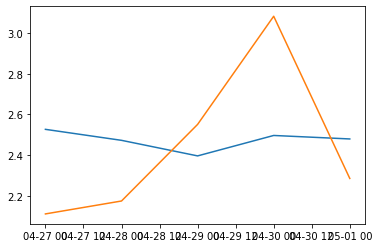

In [16]:
#y_pred.index=y_pred.index.to_timestamp()
plt.plot(pred)
plt.plot(y_cols["Label 0"][days_pred[0]:days_pred[-1]])
print(r2_score(y_cols["Label 0"][days_pred[0]:days_pred[-1]],pred))
plt.show()

In [22]:
len(y_cols["Label 0"][pred.index[0]:pred.index[-1]])


5